### Analyze Sensitivity Results

In [31]:
import os
import traceback
import pandas as pd
res_dir = 'nb_hydr_static_v5_sssim_cali_exp_4_1'
cali_dir = 'cali_exp_4'
if not os.path.isdir(cali_dir):
    os.mkdir(cali_dir)
calibration_data_org = pd.read_csv('2020P2_calibration_data_30m_qthres0.9_bins30.csv')
contents_raw = os.listdir(res_dir)
contents = []
for content_raw_i in contents_raw:
    if os.path.isfile(res_dir + os.sep + content_raw_i + os.sep + 'sensi_sim_res.csv'):
        contents.append(content_raw_i)

In [32]:
contents

['run_263',
 'run_59',
 'run_368',
 'run_96',
 'run_109',
 'run_27',
 'run_268',
 'run_200',
 'run_184',
 'run_153',
 'run_45',
 'run_300',
 'run_247',
 'run_374',
 'run_314',
 'run_348',
 'run_104',
 'run_357',
 'run_60',
 'run_191',
 'run_214',
 'run_224',
 'run_338',
 'run_345',
 'run_47',
 'run_70',
 'run_339',
 'run_183',
 'run_22',
 'run_192',
 'run_127',
 'run_384',
 'run_313',
 'run_234',
 'run_392',
 'run_3',
 'run_343',
 'run_41',
 'run_132',
 'run_349',
 'run_58',
 'run_77',
 'run_6',
 'run_113',
 'run_155',
 'run_367',
 'run_306',
 'run_271',
 'run_277',
 'run_147',
 'run_341',
 'run_383',
 'run_178',
 'run_67',
 'run_143',
 'run_103',
 'run_326',
 'run_231',
 'run_154',
 'run_140',
 'run_193',
 'run_334',
 'run_327',
 'run_259',
 'run_262',
 'run_212',
 'run_381',
 'run_364',
 'run_62',
 'run_220',
 'run_130',
 'run_369',
 'run_8',
 'run_386',
 'run_160',
 'run_204',
 'run_372',
 'run_36',
 'run_84',
 'run_295',
 'run_328',
 'run_285',
 'run_100',
 'run_252',
 'run_170',
 

In [33]:
import os
import pandas as pd
results = []
valid_contents = []

result_name = 'chw_sup_m.m_flow'
outputs = ['chw_sup_m.m_flow', 'chw_sup_P.p', 'terminal_resist.y_actual']
result_idx = outputs.index(result_name)
for content in contents:
    result_file_path = res_dir + os.sep + content + os.sep + 'sensi_sim_res.csv'
    try:
        result_pd = pd.read_csv(result_file_path, header = None)
        results.append(result_pd.values[:, result_idx])
        valid_contents.append(content)
    except Exception:
        print(traceback.format_exc())


In [34]:
print(len(results))

285


In [35]:
import numpy as np
# get calibration true data
# since each run may only randomly select a subset of calibration data, so each run has different calibration true data
calibration_datas = []

for content in contents:
    indices_file_path = res_dir + os.sep + content + os.sep + 'random_indices.csv'
    if os.path.isfile(res_dir + os.sep + content + os.sep + 'sensi_sim_res.csv'):
        if os.path.isfile(indices_file_path):
            indices_array = np.genfromtxt(result_file_path, delimiter=',')
            calibration_data_i = calibration_data_org.iloc[indices_array, :]
            calibration_datas.append(calibration_data_i)
        else:
            calibration_datas.append(calibration_data_org.iloc[:])
    else:
        pass
print(len(calibration_datas))

285


In [36]:
# remove results with none
import numpy as np
val_idx = []
for i in range(len(results)):
    result_i = results[i]
    if np.isnan(result_i).sum() == 0:
        val_idx.append(i)
results_clean = [results[j] for j in val_idx]


val_idx_col = []
for i in range(np.array(results).shape[1]):
    result_i = np.array(results)[:, i]
    if np.isnan(result_i).sum() == 0:
        val_idx_col.append(i)
len(val_idx)

285

{0: 15.767469499057553, 1: 46.383299589200476, 2: -7.4362106935892855, 3: -22.132335598448346, 4: 55.94026032942788, 5: 24.139181531536064, 6: 21.33915307139705, 7: -56.30251816679366, 8: -24.641797928614107, 9: 35.542529351318, 10: 15.748718818084496, 11: -24.957906698183628, 12: -11.517457784934784, 13: 22.794833129236444, 14: -25.58438679138345, 15: 0.8611716563760087, 16: -53.18454427882608, 17: 39.425105142002856, 18: 29.14109488641397, 19: -37.4240911540894, 20: 45.65457729019548, 21: -12.557643561079711, 22: -41.7586143691016, 23: -13.947947341224292, 24: -4.620701516935522, 25: -5.054647082907358, 26: -22.6741712379232, 27: 8.15715066029497, 28: -28.096039987058866, 29: -55.37964063023206, 30: -45.531600491207, 31: -20.101239195274132, 32: 5.612040029161744, 33: -21.46536916946317, 34: 2.8848540681239006, 35: -50.42434801414722, 36: 12.287856224338013, 37: 56.883673759589435, 38: -12.637202230041432, 39: 57.38352759029207, 40: -42.609835887594635, 41: -52.0573548799468, 42: -29

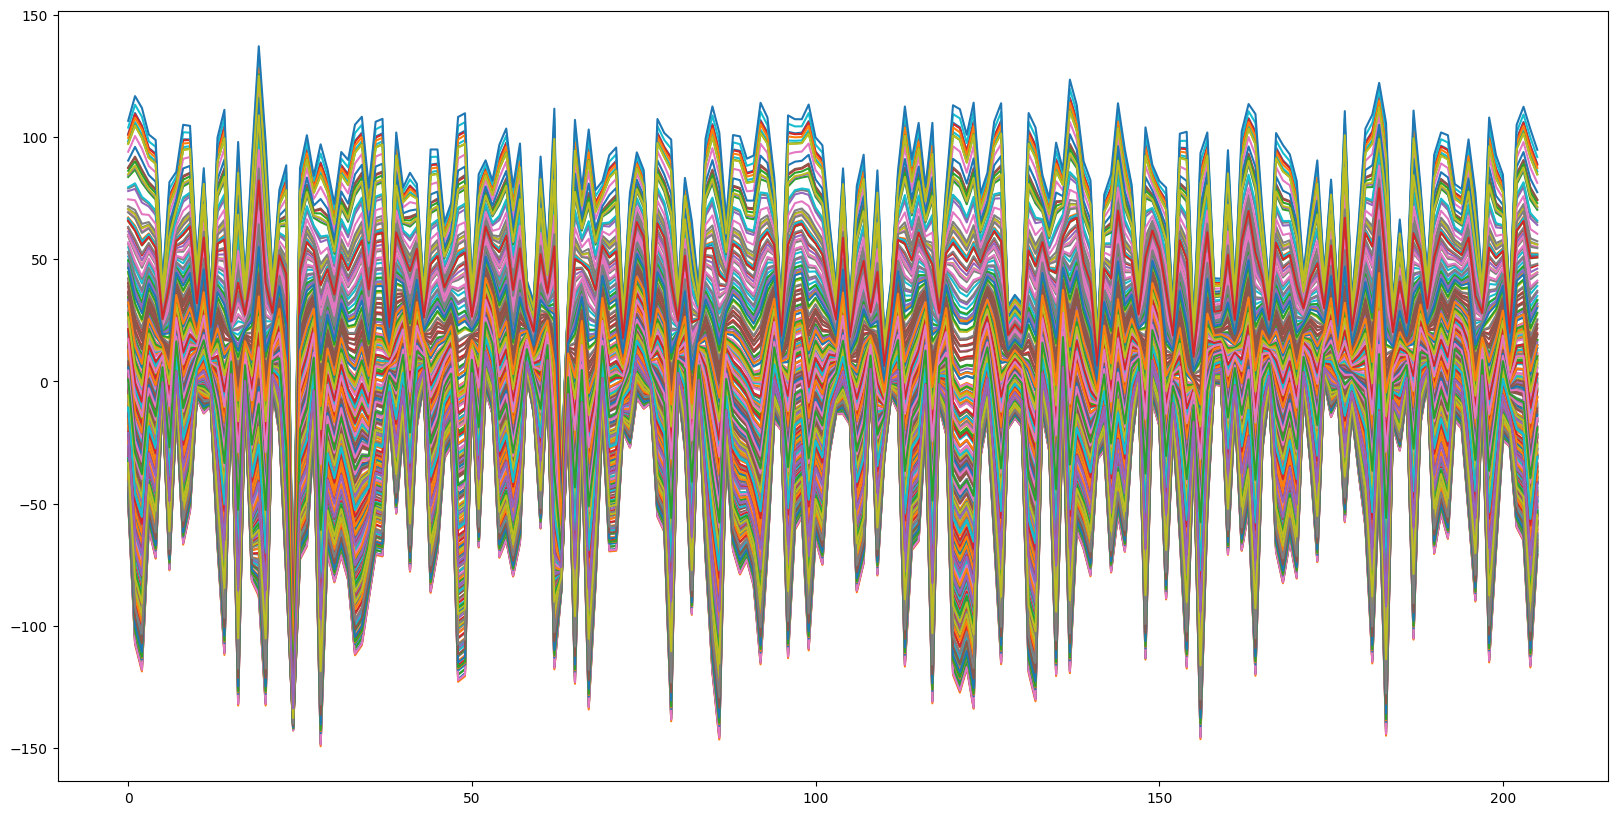

In [37]:
import matplotlib.pyplot as plt
mbes = {}
fig, axs = plt.subplots(1, figsize = (20, 10))
for i in range(len(val_idx)):
    err_i = calibration_datas[i]['NB2_S_x_NYZ_x_x_Fcw_x'].values - results_clean[i]
    axs.plot(err_i)
    mbes[i] = err_i.mean()
print(mbes)

In [38]:
valid_contents[2]

'run_368'

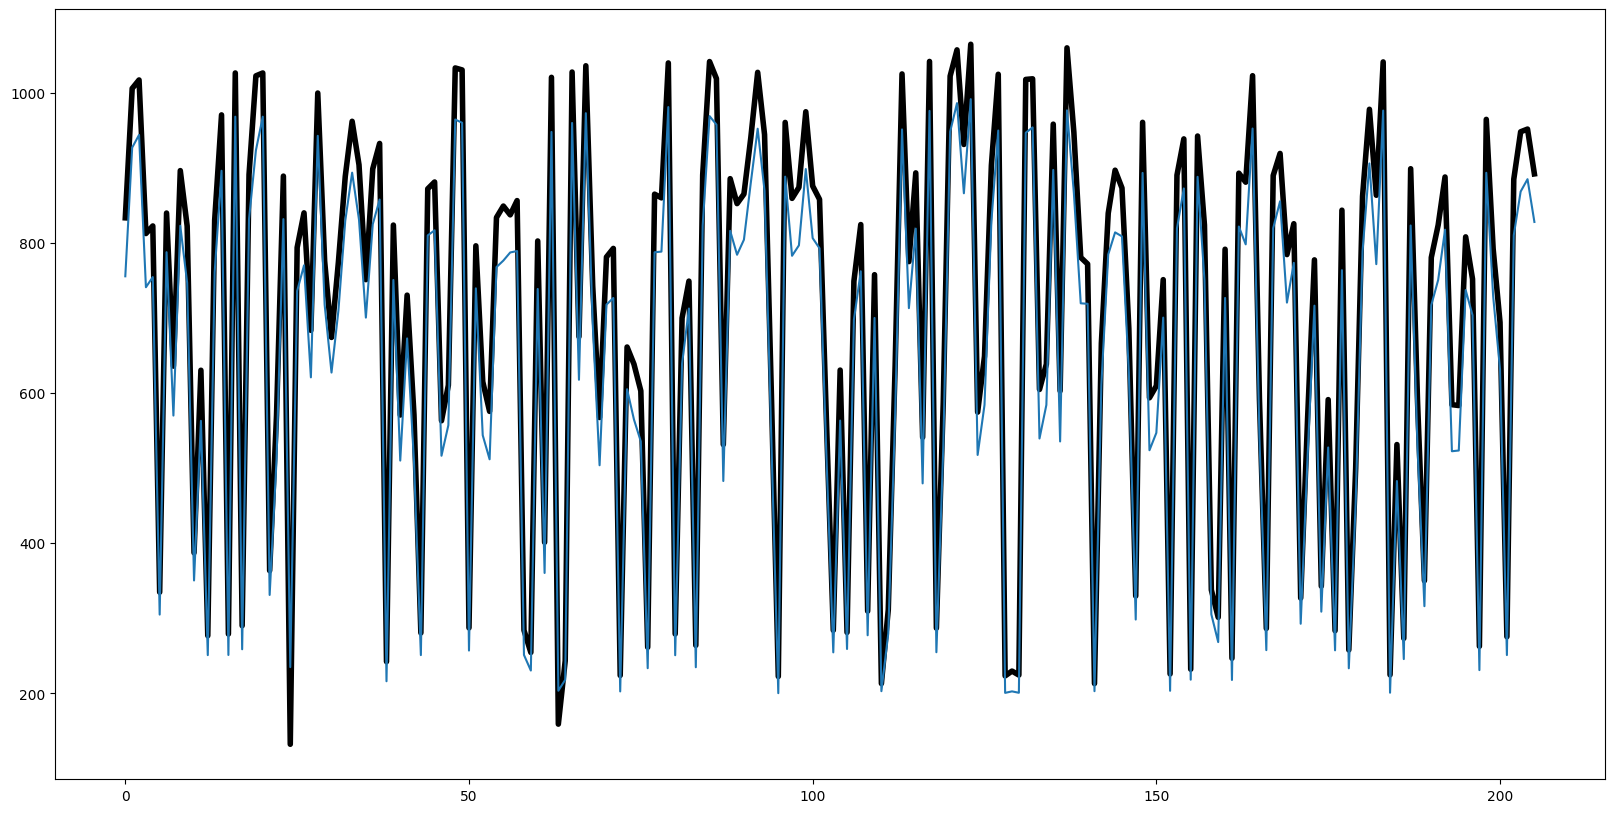

In [39]:
import matplotlib.pyplot as plt
import numpy as np
i = 4
fig, axs = plt.subplots(1, figsize = (20, 10))
axs.plot(calibration_datas[i]['NB2_S_x_NYZ_x_x_Fcw_x'].values,
         color = 'k', linewidth = 4, label = 'True')
mapes = []
cvrmses = []
result_this = results_clean[i]
axs.plot(result_this, label = 'run_{}'.format(i))
mape_i = 100*(abs(calibration_datas[i]['NB2_S_x_NYZ_x_x_Fcw_x'].values 
             - np.array(result_this))/\
             calibration_datas[i]['NB2_S_x_NYZ_x_x_Fcw_x'].values).mean()
mapes.append(mape_i)
cvrmse_i = (((calibration_datas[i]['NB2_S_x_NYZ_x_x_Fcw_x'].values 
             - np.array(result_this))**2).sum()/len(result_this))**0.5/\
            calibration_datas[i]['NB2_S_x_NYZ_x_x_Fcw_x'].values.mean()
cvrmses.append(cvrmse_i)
    

In [40]:
def get_t(mo_path):
    chr_flow_nom = None
    chr_dp_nom = None
    with open(mo_path) as file:
        lines = file.readlines()
        for line in lines:
            if 'parameter Real chr_flow_nom=' in line:
                chr_flow_nom = float(line
                                     .split('parameter Real chr_flow_nom=')[-1]
                                     .split('"')[0]
                                     .strip())
            if 'parameter Real chr_dp_nom=' in line:
                chr_dp_nom = float(line
                                     .split('parameter Real chr_dp_nom=')[-1]
                                     .split('"')[0]
                                     .strip())
            if chr_dp_nom is not None and chr_flow_nom is not None:
                break
    return chr_flow_nom, chr_dp_nom
            

In [41]:
# prepare data files for calibration
mo_file_name = 'nb_hydr_static_v6.mo'
result_name = 'chw_sup_m.m_flow'
calibration_x_names = ['NB2_S_1_NYZ_sys_x_PcwOut_x','NB2_S_1_NYZ_sys_x_PcwIn_x',
             'NB2_S_1_NYZ_cwp_9_HzSPR_x','NB2_S_1_NYZ_cwp_10_HzSPR_x',
             'NB2_S_1_NYZ_cwp_11_HzSPR_x','NB2_S_1_NYZ_cwp_12_HzSPR_x']
outputs = ['chw_sup_m.m_flow', 'chw_sup_P.p', 'terminal_resist.y_actual']
result_idx = outputs.index(result_name)

for i in range(len(contents)):
    content = contents[i]
    # get the corresponding calibration data
    calibration_x = calibration_datas[i][calibration_x_names].values

    result_file_path = res_dir + os.sep + content + os.sep + 'sensi_sim_res.csv'
    result_pd = pd.read_csv(result_file_path, header = None)
    sim_y = result_pd.values[:, result_idx].reshape(-1, 1)
    cali_sim_data = np.concatenate((sim_y, calibration_x), axis = 1)
    mo_file_path = res_dir + os.sep + content\
                + os.sep + 'compilation'\
                + os.sep + mo_file_name
    chr_pipe_len, chr_v_nom = get_t(mo_file_path)
    sim_t = np.ones((sim_y.shape[0], 2)) * (chr_pipe_len, chr_v_nom)
    cali_sim_data = np.concatenate((cali_sim_data, sim_t), axis = 1)
    cali_sim_data = pd.DataFrame(cali_sim_data)
    column_names = ['m_flow_pred']
    column_names.extend(calibration_x_names)
    column_names.extend(['chr_flow_nom', 'chr_dp_nom'])
    cali_sim_data.columns = column_names
    cali_sim_data.to_csv(res_dir + os.sep + content + os.sep + 'cali_sim_data.csv', index=False)

In [42]:
# get all parameters of sensitivity analysis
import os
import pandas as pd
import numpy as np
parameters = []

for content in contents:

    data_file_path = res_dir + os.sep + content + os.sep + 'cali_sim_data.csv'
    data_i = pd.read_csv(data_file_path)
    parameters.append(data_i.values[0, -2: ])            
parameters = np.array(parameters)
print(parameters[val_idx])

[[5.24531512e+02 1.71921556e+05]
 [5.65439564e+02 2.89682576e+05]
 [7.51449145e+02 2.50854364e+05]
 [5.48528115e+02 9.18117672e+04]
 [5.28516208e+02 2.77298637e+05]
 [6.00879977e+02 2.55284892e+05]
 [5.12647445e+02 1.76597722e+05]
 [8.96438507e+02 3.22231874e+04]
 [7.09350525e+02 1.49714267e+05]
 [5.28338798e+02 2.23673021e+05]
 [5.58124275e+02 1.95906397e+05]
 [9.35171243e+02 2.65218563e+05]
 [7.88798537e+02 2.55979354e+05]
 [6.33872526e+02 2.80438172e+05]
 [4.69672037e+02 5.82777556e+04]
 [6.07360488e+02 1.86452891e+05]
 [9.64676028e+02 6.35422131e+04]
 [2.70437493e+02 5.38201646e+04]
 [3.18933345e+02 6.92727620e+04]
 [9.57139483e+02 1.83360373e+05]
 [4.72058732e+02 1.97346010e+05]
 [5.72783928e+02 1.27355215e+05]
 [4.86900618e+02 3.15028353e+04]
 [7.29914174e+02 2.06812825e+05]
 [4.27554816e+02 7.88201492e+04]
 [7.93710959e+02 2.93732919e+05]
 [7.40200025e+02 1.72915478e+05]
 [6.89144582e+02 2.72646083e+05]
 [5.72637821e+02 8.46201339e+04]
 [7.47899998e+02 2.38002541e+04]
 [9.067387

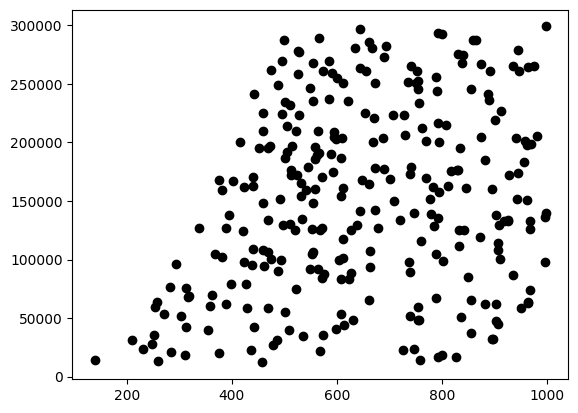

In [43]:
plt.scatter(parameters[:, 0], parameters[:, 1], color ='k')

In [44]:
# get a closer range for the parameters of sensitivity analysis
import os
import pandas as pd
import numpy as np
parameters = []
narrowed_run_dirs = []
mape_thres = 100

for i in range(len(contents)):
    content = contents[i]
    y_true = calibration_datas[i]['NB2_S_x_NYZ_x_x_Fcw_x'].values
    
    data_file_path = res_dir + os.sep + content + os.sep + 'cali_sim_data.csv'
    data_i = pd.read_csv(data_file_path)
    y_pred_i = data_i['m_flow_pred'].values
    mape_i = 100*(abs(y_true - y_pred_i)/y_true).mean()
    if mape_i <= mape_thres:
        parameters.append(data_i.values[0, -2: ])
        narrowed_run_dirs.append(res_dir + os.sep + content)
            
parameters = np.array(parameters)
print(len(narrowed_run_dirs))

285


In [45]:
# collect all cali_sim_data
cali_sim_data_all = None

for i in range(len(contents)):
    content = contents[i]
    data_file_path = res_dir + os.sep + content + os.sep + 'cali_sim_data.csv'
    if (res_dir + os.sep + content) in narrowed_run_dirs:
        data_i = pd.read_csv(data_file_path)
        if cali_sim_data_all is None:
            cali_sim_data_all = data_i
        else:
            cali_sim_data_all = pd.concat([cali_sim_data_all, data_i],
                                  ignore_index = True)

In [46]:
cali_sim_data_all.shape

(58710, 9)

In [47]:
cali_sim_data_all.to_csv('{}/cali_sim_data_all.csv'.format(cali_dir),
                        index=False)

In [54]:
# Down sample
from BayesianCalibration.DownSampler import DownSampler
import pandas as pd
field_data_columns = ['NB2_S_x_NYZ_x_x_Fcw_x', 'NB2_S_1_NYZ_sys_x_PcwOut_x', 
                      'NB2_S_1_NYZ_sys_x_PcwIn_x', 'NB2_S_1_NYZ_cwp_9_HzSPR_x',
                      'NB2_S_1_NYZ_cwp_10_HzSPR_x', 'NB2_S_1_NYZ_cwp_11_HzSPR_x',
                      'NB2_S_1_NYZ_cwp_12_HzSPR_x']

cali_sim_data_path = './{}/cali_sim_data_all.csv'.format(cali_dir)
field_df = calibration_data_org[field_data_columns]

bins = 30
quality_thres_sim = 0.85
quality_thres_field = 1
dirichlet_prior = 0.5
sim_df = pd.read_csv(cali_sim_data_path)
d_sim = sim_df.values
d_field = field_df.values

ds_d_sim = DownSampler(d_sim, bins = bins, dirichlet_prior = dirichlet_prior)
(d_sim_down, d_sim_sp_hist) = ds_d_sim.sample(stSampleSize = 50, 
                                              increRatio = 1.05, 
                                              qualityThres = quality_thres_sim)
d_sim_down_df = pd.DataFrame(d_sim_down)
d_sim_down_df.columns = [list(sim_df.columns)]
d_sim_down_df.to_csv('./{}/cali_sim_data_down.csv'.format(cali_dir), index = False)

ds_d_field = DownSampler(d_field, bins = bins, dirichlet_prior = dirichlet_prior)
(d_field_down, d_field_sp_hist) = ds_d_field.sample(stSampleSize = 50, 
                                              increRatio = 1.01, 
                                              qualityThres = quality_thres_field)
d_field_down_df = pd.DataFrame(d_field_down)
d_field_down_df.columns = [field_data_columns]
d_field_down_df.to_csv('./{}/cali_field_data_down.csv'.format(cali_dir), index = False)

[0.02466582 0.06813963 0.07321413 0.02739038 0.01938697 0.00906769
 0.00143891 0.00043423 0.00348233 0.01567476 0.03604087 0.05816092
 0.04026394 0.02245211 0.02063006 0.01867178 0.0237633  0.04247765
 0.06720307 0.07243082 0.0663857  0.06362708 0.04951043 0.03392933
 0.03234568 0.0334355  0.03054066 0.02727118 0.0150447  0.00292039]
52
54
56
58
60
63
66
69
72
75
78
81
85
89
93
97
101
106
111
116
121
127
133
139
145
152
159
166
174
182
191
200
210
220
231
242
254
266
279
292
306
[0.01131222 0.00226244 0.03393665 0.03393665 0.07918552 0.02036199
 0.02488688 0.01131222 0.01131222 0.00226244 0.00226244 0.00678733
 0.01131222 0.02036199 0.06561086 0.02941176 0.03393665 0.02941176
 0.01131222 0.03393665 0.04751131 0.03846154 0.07013575 0.06561086
 0.09276018 0.02488688 0.0520362  0.0158371  0.07918552 0.03846154]
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
1